##  Imports

In [92]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

### Challenge 1: 

Get the Bitcoin market value vs USD for last 30 days. For your results, you would like to deliver them both as a DataFrame and then create an appropriate plot.

Hint: start by creating a base_url for the Coingecko API, and then adding the parameters you want by looking at the documentation, which you can find here: https://www.coingecko.com/api/documentations/v3#

Specifically in this example, we are looking at: https://www.coingecko.com/api/documentations/v3#/coins/get_coins__id__market_chart

You want a coin (Bitcoin), vs USD, timeframe of 30 days.

For creating the DataFrame, you can print out all of the keys of your resulting json file, to see which ones you would like to extract as columns! The timestamp for these dataseries is in milliseconds - you can convert it to a convenient format using pd.to_datetime (look into how you can specify the unit here!)

In [2]:
# Your code here:
base = 'https://api.coingecko.com/api/v3/'
url = base + 'coins/bitcoin/market_chart'
param_dict = {'id':'bitcoin', 'vs_currency':'usd', 'days':30}

response = requests.get(url, params=param_dict)
results = response.json()

print(results.keys())

# now create a dataframe and a plot!

dict_keys(['prices', 'market_caps', 'total_volumes'])


In [46]:
prices = pd.DataFrame(results["prices"])

In [47]:
market_caps = pd.DataFrame(results["market_caps"])

In [48]:
total_volumes = pd.DataFrame(results["total_volumes"])

In [38]:
concat = [prices,market_caps,total_volumes]

In [83]:
df = pd.concat(concat,axis=1,ignore_index=True)
df = df.drop([2,4],axis=1)

In [84]:
df.rename(columns = {0:"date",1:"prices",3:"market_caps",5:"total_volumes"},inplace=True)

In [85]:
df["date"] = pd.to_datetime(df["date"],unit="ms")

In [86]:
df.head()

,date,prices,market_caps,total_volumes
0,2020-09-08 18:06:35.390,10161.669939,1.878728e+11,2.516628e+10
1,2020-09-08 19:04:49.351,9978.866934,1.845693e+11,4.595180e+10
2,2020-09-08 20:09:12.369,10035.487962,1.848802e+11,4.637075e+10
3,2020-09-08 21:07:00.045,10004.316334,1.853500e+11,4.634483e+10
4,2020-09-08 22:02:13.874,10035.279584,1.848613e+11,4.665163e+10


In [78]:
df["market_caps"] = df["market_caps"].apply(lambda x: '%.5f' % x)

In [79]:
df["total_volumes"] = df["total_volumes"].apply(lambda x: '%.5f' % x)

In [80]:
df

,date,prices,market_caps,total_volumes
0,2020-09-08 18:06:35.390,10161.669939,187872796083.47998,25166282319.18417
1,2020-09-08 19:04:49.351,9978.866934,184569293251.34650,45951802996.11790
2,2020-09-08 20:09:12.369,10035.487962,184880236764.03738,46370746574.33752
3,2020-09-08 21:07:00.045,10004.316334,185349979454.20566,46344831359.60129
4,2020-09-08 22:02:13.874,10035.279584,184861301524.87192,46651630923.38908
...,...,...,...,...
716,2020-10-08 14:05:07.225,10734.841332,198717006239.62195,18149142091.04462
717,2020-10-08 15:08:52.776,10914.223466,201879529063.36963,19455345247.11687
718,2020-10-08 16:09:39.632,10905.082526,201688770809.50494,19579021043.82126
719,2020-10-08 17:02:01.391,10923.247265,201832143219.96494,19844676458.31769


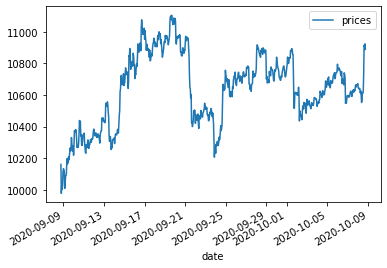

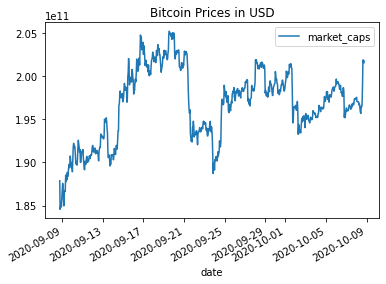

In [96]:
df.plot(x="date",y="prices")
df.plot(x="date",y="market_caps")
plt.title("Bitcoin Prices in USD")
plt.show()

### Challenge 2: 

Get the Litecoin market value vs USD for last 30 days. For your results, you would like to deliver them both as a DataFrame and then create an appropriate plot.


In [102]:
# Your code here:
base = 'https://api.coingecko.com/api/v3/'
url = base + 'coins/litecoin/market_chart'
param_dict = {'id':'litecoin', 'vs_currency':'usd', 'days':30}


response = requests.get(url, params=param_dict)
results = response.json()

print(results.keys())

dict_keys(['prices', 'market_caps', 'total_volumes'])


In [103]:
prices = pd.DataFrame(results["prices"])
market_caps = pd.DataFrame(results["market_caps"])
total_volumes = pd.DataFrame(results["total_volumes"])

In [112]:
concat = [prices,market_caps,total_volumes]
df = pd.concat(concat,axis=1,ignore_index=True)
df = df.drop([2,4],axis=1)
df.rename(columns = {0:"date",1:"prices",3:"market_caps",5:"total_volumes"},inplace=True)
df["date"] = pd.to_datetime(df["date"],unit="ms")

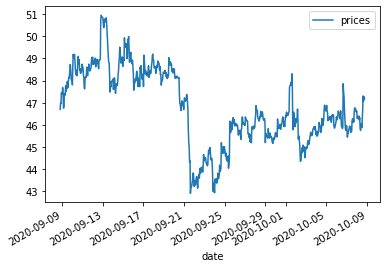

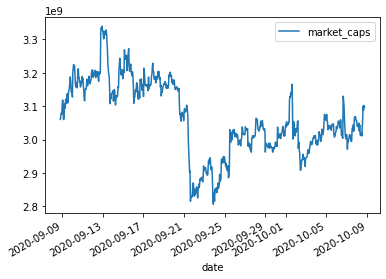

In [115]:
df.plot(x="date",y="prices")
df.plot(x="date",y="market_caps")
plt.show()

### Challenge 3: 

Get historical data for Bitcoin on January 1st, 2020. As a result, you would like to have a Dataframe which contains all of the currencies against which the price is expressed in one column, and the current price (at that date) in a second column.

Hint: you might receive an error message saying "If using all scalar values, you must pass an index". Google it! :)


In [148]:
# Your code here:
base = 'https://api.coingecko.com/api/v3/'
url = base + 'coins/bitcoin/history'
param_dict = {'id':'bitcoin', 'date':"01-01-2020"}


response = requests.get(url, params=param_dict)
results = response.json()

print(results.keys())

dict_keys(['id', 'symbol', 'name', 'localization', 'image', 'market_data', 'community_data', 'developer_data', 'public_interest_stats'])


In [157]:
df = pd.json_normalize(results["market_data"]["current_price"]).transpose().reset_index()

In [160]:
df.rename(columns={"index":"currency",0:"Current Price"},inplace=True)

In [161]:
df.head()

,currency,Current Price
0,aed,26429.239289
1,ars,430563.045710
2,aud,10256.814196
3,bch,35.139455
4,bdt,610699.091067


### Challenge 3: 

Get the ids of all of the coins listed on Coingecko. Extract the bottom ten IDs in a Dataframe.

In [144]:
url = "https://api.coingecko.com/api/v3/coins/list"
response = requests.get(url)
results = response.json()
id_coins = pd.DataFrame(results)

In [145]:
id_coins.tail(10)

,id,symbol,name
5900,zulu-republic-token,ztx,Zulu Republic Token
5901,zumcoin,zum,ZumCoin
5902,zum-token,zum,ZUM TOKEN
5903,zumy,zmy,Zumy
5904,zvchain,zvc,ZVCHAIN
5905,zxth,zxth,ZXTH
5906,zynecoin,zyn,Zynecoin
5907,zyro,zyro,Zyro
5908,zyx,zyx,ZYX
5909,zzz-finance,zzz,zzz.finance


### Bonus Challenge: 

Write a loop that goes through the 10 coins you retrieved in challenge 3, and for each of them collects the market values against USD for the last 30 days. Then create a dataframe which has three columns: 'time', 'price' and 'coin' and combines the data of all these ten coins.

If you're ambitious: create a plot with 10 subplots for all of the series!

In [164]:
coins = list(id_coins["id"][-10:])

In [174]:
# for loop ile dataframe olusturma , ve api üzerinden datayi alip sürekli yeni gelen data ile concat yapmak
df_all = pd.DataFrame()

for i in coins:
    url = base + 'coins/' + i + '/market_chart'
    param_dict = {'id': i, 'vs_currency':'usd', 'days':30}
    response = requests.get(url,param_dict)
    results = response.json()
    df = pd.DataFrame(results["prices"],columns=["time","price"]) # prices sütunu aliyor ama sütun isimlerini degistiriyoruz
    df["coin"] = i # hangi para degeri hangisi onun icin yeni bir sütun yaratip i diyoruz ona
    df_all = pd.concat([df_all, df]) #listede bulunan bütün coinlerin concat olup eklenmesi lazim o yüzden bunu yapiyoruz, yoksa sadece tek bir coin ekleniyor liste

In [175]:
df_all

,time,price,coin
0,1600413417475,0.001046,zulu-republic-token
1,1600416921327,0.001047,zulu-republic-token
2,1600420658004,0.001048,zulu-republic-token
3,1600424229370,0.001052,zulu-republic-token
4,1600849043844,0.000417,zulu-republic-token
...,...,...,...
716,1602412096722,132.075874,zzz-finance
717,1602415186022,133.102563,zzz-finance
718,1602419258956,131.998419,zzz-finance
719,1602422809230,131.773606,zzz-finance


In [182]:
df_all["time"] = pd.to_datetime(df_all["time"],unit="ms")

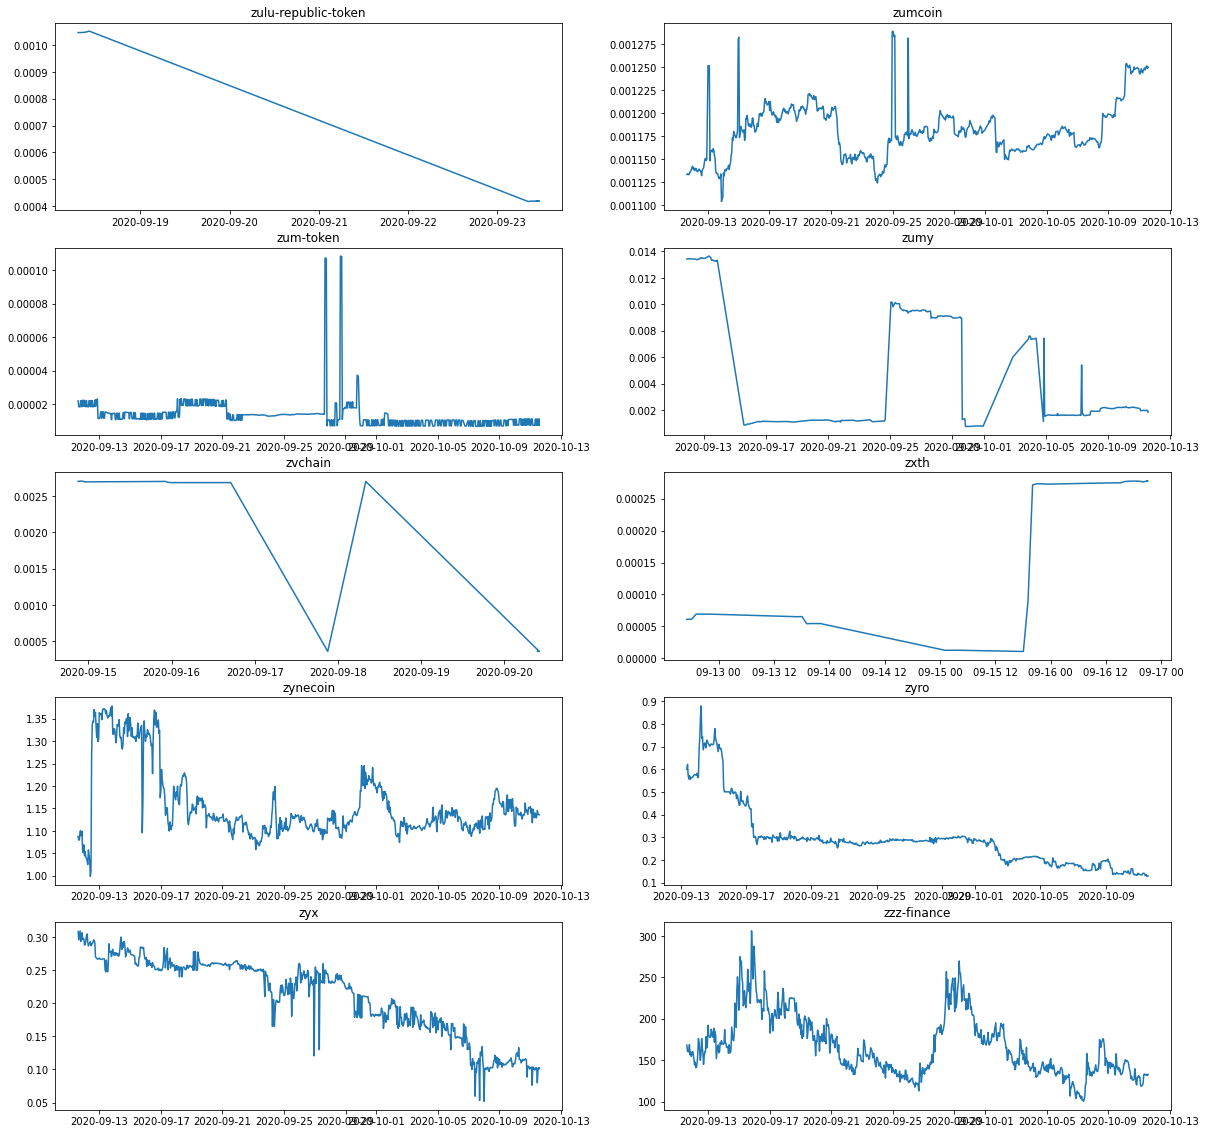

In [191]:
#for loop ile subplot yapmak
fig = plt.figure(figsize=(20,20))

for num in range(10):
    i = coins[num] # listenin icindeki coinlere ulas
    ax = fig.add_subplot(5,2,num+1) # ax lari yarat, 5 sira 2 sütun olucak ve siralari 1 er 1 er artacaj
    subdf = df_all[df_all['coin'] == i] # her coin icin df yarat == i yaparak
    ax.plot(subdf['time'], subdf['price']) #time ve price al
    ax.set_title(i) #hepsi icin title al
plt.show()